In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import pickle

In [2]:
# 출력 precision 설정.
np.set_printoptions(precision=3)
pd.set_option("display.precision",3)
%precision %.3f

'%.3f'

#### 데이터 가져오기

In [3]:
df1 = pd.read_excel(r'../data/p1.xlsx',engine='openpyxl')
df2 = pd.read_excel(r'../data/p2.xlsx',engine='openpyxl')
df3 = pd.read_excel(r'../data/p3.xlsx',engine='openpyxl')
df4 = pd.read_excel(r'../data/p4.xlsx',engine='openpyxl')
df5 = pd.read_excel(r'../data/p5.xlsx',engine='openpyxl')
df6 = pd.read_excel(r'../data/p6.xlsx',engine='openpyxl')
df7 = pd.read_excel(r'../data/p7.xlsx',engine='openpyxl')
df8 = pd.read_excel(r'../data/p8.xlsx',engine='openpyxl')
df9 = pd.read_excel(r'../data/p9.xlsx',engine='openpyxl')
df10 = pd.read_excel(r'../data/p10.xlsx',engine='openpyxl')
df11 = pd.read_excel(r'../data/p11.xlsx',engine='openpyxl')
df12 = pd.read_excel(r'../data/p12.xlsx',engine='openpyxl')
df13 = pd.read_excel(r'../data/p13.xlsx',engine='openpyxl')
df14 = pd.read_excel(r'../data/p14.xlsx',engine='openpyxl')
df15 = pd.read_excel(r'../data/p15.xlsx',engine='openpyxl')
df16 = pd.read_excel(r'../data/p16.xlsx',engine='openpyxl')
df17 = pd.read_excel(r'../data/p17.xlsx',engine='openpyxl')
df18 = pd.read_excel(r'../data/p18.xlsx',engine='openpyxl')
df19 = pd.read_excel(r'../data/p19.xlsx',engine='openpyxl')
df20 = pd.read_excel(r'../data/p20.xlsx',engine='openpyxl')
df21 = pd.read_excel(r'../data/p21.xlsx',engine='openpyxl')
df22 = pd.read_excel(r'../data/p22.xlsx',engine='openpyxl')
df23 = pd.read_excel(r'../data/p23.xlsx',engine='openpyxl')
df24 = pd.read_excel(r'../data/p24.xlsx',engine='openpyxl')
df25 = pd.read_excel(r'../data/p25.xlsx',engine='openpyxl')
df26 = pd.read_excel(r'../data/p26.xlsx',engine='openpyxl')
df27 = pd.read_excel(r'../data/p27.xlsx',engine='openpyxl')
df28 = pd.read_excel(r'../data/p28.xlsx',engine='openpyxl')
df29 = pd.read_excel(r'../data/p29.xlsx',engine='openpyxl')
df30 = pd.read_excel(r'../data/p30.xlsx',engine='openpyxl')
df31 = pd.read_excel(r'../data/p31.xlsx',engine='openpyxl')
df32 = pd.read_excel(r'../data/p32.xlsx',engine='openpyxl')
df33 = pd.read_excel(r'../data/p33.xlsx',engine='openpyxl')
df34 = pd.read_excel(r'../data/p34.xlsx',engine='openpyxl')
df35 = pd.read_excel(r'../data/p35.xlsx',engine='openpyxl')
df36 = pd.read_excel(r'../data/p36.xlsx',engine='openpyxl')

In [4]:
df_new = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36],axis=0)

In [5]:
df_new = df_new.drop(columns=0)

In [6]:
df_new.rename(columns={1:'pixels','Unnamed: 2':'pops'},inplace=True)

In [7]:
df_new.reset_index(drop=True, inplace=True)
df_new

,pixels,pops
0,79646,6.00
1,27575,3.75
2,52398,4.75
3,68525,6.25
4,123982,12.25
...,...,...
1039,117077,11.00
1040,18203,1.00
1041,45337,4.25
1042,86712,9.00


In [8]:
# 설명변수 설정
X = df_new.drop(columns=['pops'])
X

,pixels
0,79646
1,27575
2,52398
3,68525
4,123982
...,...
1039,117077
1040,18203
1041,45337
1042,86712


In [9]:
# 반응변수 설정
Y = df_new[ ['pops'] ]
Y

,pops
0,6.00
1,3.75
2,4.75
3,6.25
4,12.25
...,...
1039,11.00
1040,1.00
1041,4.25
1042,9.00


In [10]:
with open('cnn_y.pkl','wb') as f:
    pickle.dump(Y,f)

In [11]:
# 기술통계 요약.
df_new.describe()

,pixels,pops
count,1044.000,1044.000
mean,77986.949,7.395
std,40405.731,3.770
min,0.000,0.000
25%,50018.000,5.000
50%,76511.000,7.250
75%,105212.250,10.000
max,207872.000,19.750


In [12]:
df_new.corr()

,pixels,pops
pixels,1.000,0.971
pops,0.971,1.000


In [13]:
myModel1 = smf.ols(formula = 'pops ~ pixels', data=df_new)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pops   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:29:37   Log-Likelihood:                -1369.9
No. Observations:                1044   AIC:                             2744.
Df Residuals:                    1042   BIC:                             2754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3294      0.061      5.440      0.000       0.211       0.448
pixels       9.06e-05   6.89e-07    131.423      0.000    8.93e-05     9.2e-05
==============================================================================
Omnibus:                       66.569   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.062
Skew:                           0.432   Prob(JB):                     2.56e-28
Kurtosis:                       4.474   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

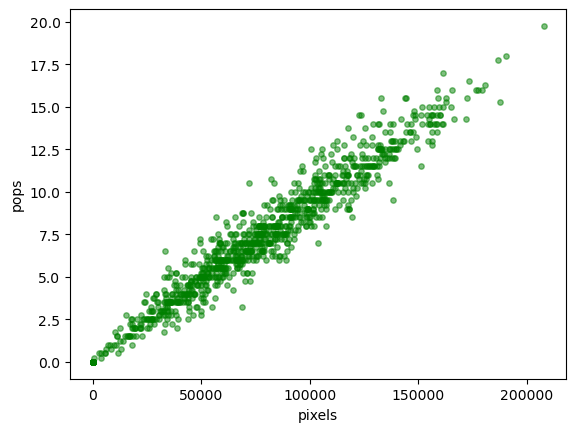

In [14]:
# RM vs PRICE 산점도 출력.
plt.scatter(X,Y, c = 'g',s=15,alpha=0.5)
#plt.scatter(df.RM, df.PRICE, c = 'g',s=15,alpha=0.5)
plt.xlabel('pixels')
plt.ylabel('pops')
plt.show()

#### 선형회귀 학습

In [15]:
# 데이터셋 쪼개기.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(730, 1)
(314, 1)
(730, 1)
(314, 1)


In [16]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
predY_in = lm.predict(X_train)
predY_out = lm.predict(X_test)

In [17]:
lm.coef_

array([[9.041e-05]])

#### 선형을 이루는지 확인

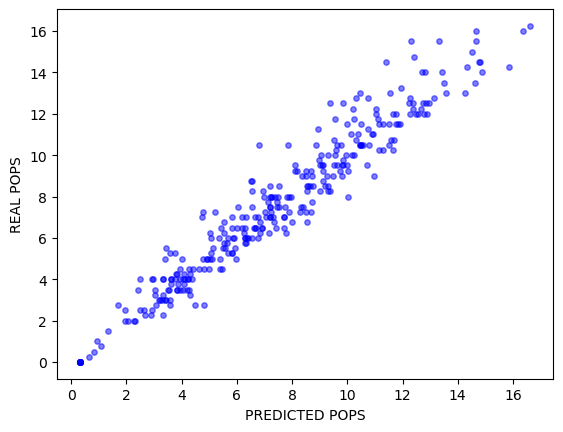

In [18]:
# 실제 Y vs 예측 Y 출력.
plt.scatter(predY_out,Y_test,c = 'blue', s=15, alpha=0.5)
plt.ylabel('REAL POPS')
plt.xlabel('PREDICTED POPS')
plt.show()

In [19]:
Y_ex = Y_test['pops'].reset_index(drop=True)
Y_ex

0       5.00
1      11.50
2       4.00
3       6.00
4      12.75
       ...  
309     6.50
310     2.50
311     9.00
312     9.00
313    15.50
Name: pops, Length: 314, dtype: float64

In [20]:
Y_ex.corr(pd.Series(predY_out[:,0]))**2

0.938

#### 오류 분석

In [21]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, predY_in)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, predY_out)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, predY_in))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, predY_out))))

In-sample MSE is      : 0.7748940454254241
Out-of-sample MSE is  : 0.8907023667440472
--------------------------------------------------
In-sample RMSE is     : 0.880280662871464
Out-of-sample RMSE is : 0.943770293421046


In [22]:
# 잔차 계산.
residual = Y_test - predY_out

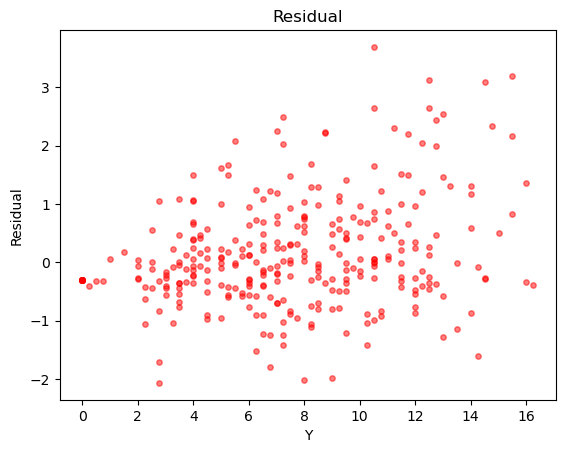

In [24]:
# 잔차 분석
plt.scatter(Y_test,residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

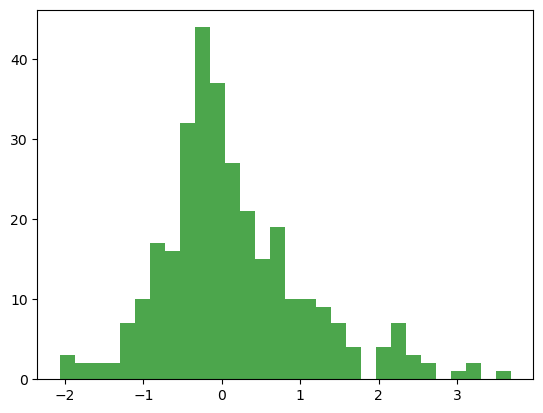

In [30]:
plt.hist(residual, bins=30, color='green', alpha=0.7)
plt.show()